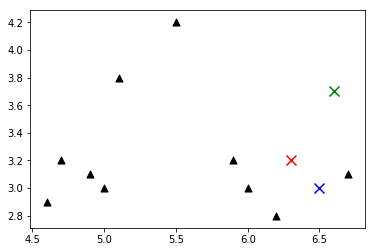

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from copy import deepcopy
%matplotlib inline

X = np.array([
    [5.5,4.2],
    [5.1,3.8],
    [4.7,3.2],
    [4.9,3.1],
    [5.0,3.0],
    [4.6,2.9],
    [5.9,3.2],
    [6.0,3.0],
    [6.2,2.8],
    [6.7,3.1],
])

n = 10 # number of data points
k = 3 # number of clusters
centers = np.array([
                    [6.3,3.2], # red
                    [6.6,3.7], # green
                    [6.5,3.0] # blue
                ])

# define a function to plot
def visualize(X, centers):
    fig = plt.figure()
    plt.scatter(X[:,0],X[:,1],50,color='black',marker="^")
    plt.scatter(centers[:1,0],centers[:1,1],100,color='red',marker="x")
    plt.scatter(centers[1:2,0],centers[1:2,1],100,color='green',marker="x")
    plt.scatter(centers[2:3,0],centers[2:3,1],100,color='blue',marker="x")
    plt.show()
    
visualize(X, centers) # initial data points and means

After iteration 1 , new centers are 
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
The difference between to iterations 1.6551404157709295


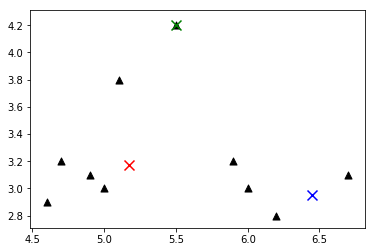

After iteration 2 , new centers are 
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
The difference between to iterations 0.5484788798419249


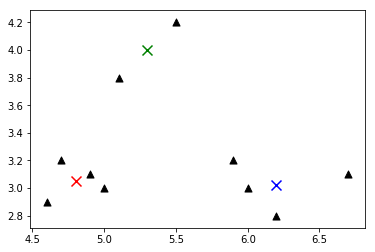

After iteration 3 , new centers are 
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
The difference between to iterations 0.0


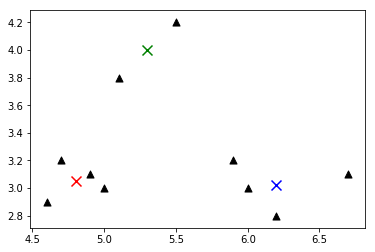

Converged !!


In [90]:
'''implement k-means algorithm'''

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old) # difference between two iterations

iter = 0
while error != 0: # stop when the last one assignment is the same as last try
    iter += 1
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(X - centers[i], axis=1) 
    clusters = np.argmin(distances, axis = 1) # Assign all training data to closest center
    
    centers_old = deepcopy(centers_new)
    
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    print 'After iteration',iter,', new centers are \n',centers_new
    error = np.linalg.norm(centers_new - centers_old)
    centers = centers_new
    print 'The difference between to iterations',error
    visualize(X, centers)
    
    
    
print 'Converged !!'

So, we could see, after second iteration, the assignments don't change. Only need 2 iterations to converge.